# **MODELO NIVEL NIVEL**

In [22]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns 

sns.set()


In [11]:
df = pd.read_excel('Lanchonetes.xlsx', sheet_name='Dados', usecols = ['RT', 'Preco', 'Propaganda'])

In [19]:
df

,RT,Preco,Propaganda
0,12129.131000,21.2,5108.1
1,19175.832845,20.4,8629.0
2,13001.348495,23.7,5548.4
3,30668.024388,22.4,14378.2
4,30581.377510,21.5,14333.8
5,15220.000000,29.4,8550.0
6,23670.900000,27.3,11950.7
7,20698.505418,22.2,9394.1
8,20883.787743,25.1,9491.8
9,15400.600000,29.5,7888.2


In [13]:
df.shape

(56, 3)

### **REGRESSÃO PELO MÉTODO DE MQQ**

In [14]:
model = smf.ols('RT ~ Preco + Propaganda', df)
resultado = model.fit()

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                     RT   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1009.
Date:                Sun, 05 May 2024   Prob (F-statistic):           6.51e-43
Time:                        15:29:51   Log-Likelihood:                -469.23
No. Observations:                  56   AIC:                             944.5
Df Residuals:                      53   BIC:                             950.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1857.1808   1065.734      1.743      0.0

In [15]:
# Verificando os estimadores dos Parametros
round(resultado.params,2)

Intercept     1857.18
Preco           -9.36
Propaganda       1.99
dtype: float64

In [16]:
'''
    Função de Regressão Amostral ou Reta de Regressçao de MQO 
    RT = 1857.18 - 9.36*Preco + 1.99*Propaganda
'''

'\n    RT = 1857.18 - 9.36*Preco + 1.99*Propaganda\n'

In [ ]:
29.4	8550.0 	15220.000000

In [20]:
# Valor ajustado ou previsto 
preco = 29.4
propaganda = 8550.0 
receita = resultado.predict(exog = {'Preco':preco, 'Propaganda':propaganda})
receita = round(receita,2)
print(receita)

0    18594.65
dtype: float64


### **RESIDUO**
e = valor_observado - valor_previsto </br>
e = 23141.74 - 22741.44 </br>
e = 400.30

/tmp/ipykernel_50035/81292145.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultado.resid)


<Axes: ylabel='Density'>

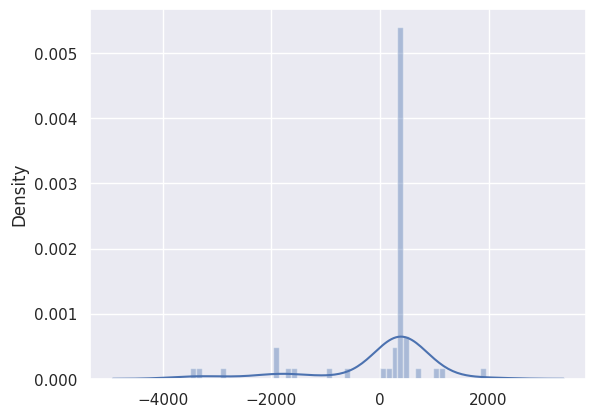

In [24]:
sns.distplot(resultado.resid)

In [26]:
# Residuo por amostra
resultado.resid[4]

404.2601786086234

In [27]:
resultado.rsquared

0.9744103772412668